# Trying Tvec with Random Forest to see if it will be a better model than Cvec/RF or Tvec/Log

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
#read in both datasets
harry = pd.read_csv('../Data/yer-a-wizard-Harry.csv')
starwars = pd.read_csv('../Data/Luke-After-Yoda.csv')

In [3]:
#reading in new df as df
df = pd.read_csv('../Data/Harry_Skywalker_Bi_Clean.csv')
df.head()

,created_utc,subreddit,combo_text,length,word_count
0,1.697753e+09,0,I find the scene where Hedwig is indignant wit...,615,117
1,1.697736e+09,0,Polyjuice Potion - I'm reading the books again...,670,116
2,1.697733e+09,0,Challenged my friend to the hardest HP trivia ...,887,168
3,1.697726e+09,0,Sometimes it feels exhausted to love an unpopu...,334,56
4,1.697724e+09,0,The Trace - We know all kids under the age of ...,496,88


In [4]:
# using TF-IDF as tvec for both subreddits to take out stop words
tvec = TfidfVectorizer(stop_words='english')

In [5]:
# fitting tvec, from Lesson 505
tvec_harry = pd.DataFrame(tvec.fit_transform(df[df.subreddit==0].combo_text).todense(),
                          columns=tvec.get_feature_names_out())
tvec_harry.head()

,00,000,02,026,07,08,090,10,100,1000,...,yugoslavic,yule,z5qwyx0,zacharias,zaney,zero,zi,zograf,zoo,zuko
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111986,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15205,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [6]:
tvec_luke = pd.DataFrame(tvec.fit_transform(df[df.subreddit== 1].combo_text).todense(),
                       columns=tvec.get_feature_names_out())
tvec_luke.head()

,000,032,04,05,06,0618,08,09,0bby,0m21s,...,zombified,zone,zoom,zoomed,zu,zur,zusammenhängt,ähnlichen,δαίμων,θεοί
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


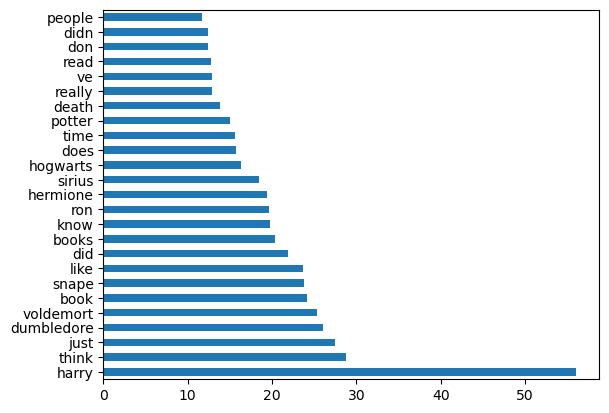

In [7]:
# find most used words in each, then plot for viz
tvec_harry.sum().sort_values(ascending =False)[:25].plot(kind = 'barh');

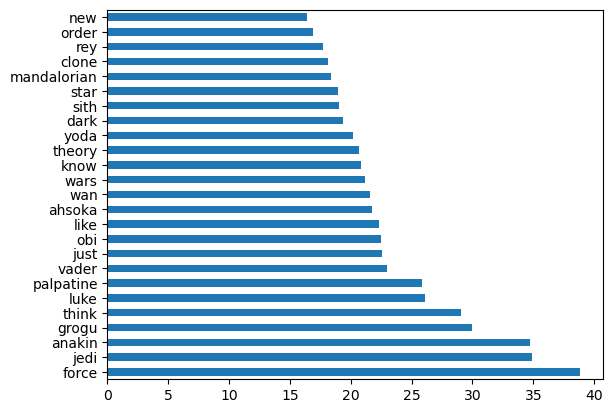

In [8]:
tvec_luke.sum().sort_values(ascending=False)[:25].plot(kind='barh');

In [9]:
#establishing X and y
X = df['combo_text']
y = df['subreddit']

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
# make a tvec for the entire X_train to see overall values
X_train_tvec = pd.DataFrame(tvec.fit_transform(X_train).todense(),columns = tvec.get_feature_names_out())
X_train_tvec

,00,000,02,026,032,04,05,06,0618,07,...,zone,zoo,zoom,zu,zuko,zur,zusammenhängt,ähnlichen,δαίμων,θεοί
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# make pipeline for tvec and Random Forest
tvec_rf_pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [13]:
# parameters for tvec and log regression
tvec_rf_pipe.get_params()

{'memory': None,
 'steps': [('tvec', TfidfVectorizer()), ('rf', RandomForestClassifier())],
 'verbose': False,
 'tvec': TfidfVectorizer(),
 'rf': RandomForestClassifier(),
 'tvec__analyzer': 'word',
 'tvec__binary': False,
 'tvec__decode_error': 'strict',
 'tvec__dtype': numpy.float64,
 'tvec__encoding': 'utf-8',
 'tvec__input': 'content',
 'tvec__lowercase': True,
 'tvec__max_df': 1.0,
 'tvec__max_features': None,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__norm': 'l2',
 'tvec__preprocessor': None,
 'tvec__smooth_idf': True,
 'tvec__stop_words': None,
 'tvec__strip_accents': None,
 'tvec__sublinear_tf': False,
 'tvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tvec__tokenizer': None,
 'tvec__use_idf': True,
 'tvec__vocabulary': None,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__class_weight': None,
 'rf__criterion': 'gini',
 'rf__max_depth': None,
 'rf__max_features': 'sqrt',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 '

In [14]:
# input parameters for GridSearch
tvec_rf_params = {
    'tvec__max_features': [3000, 6000, 9000],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100, 200], 
    'rf__max_depth': [None, 10, 20],
    'rf__random_state': [2023]
}

In [15]:
# Instantiate GridSearch
gs_tvec_rf = GridSearchCV(tvec_rf_pipe,
                           param_grid = tvec_rf_params,
                           cv = 5,
                           n_jobs = 4)

In [16]:
# fit GridSearch to training data
gs_tvec_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=4,
             param_grid={'rf__max_depth': [None, 10, 20],
                         'rf__n_estimators': [50, 100, 200],
                         'rf__random_state': [2023],
                         'tvec__max_features': [3000, 6000, 9000],
                         'tvec__ngram_range': [(1, 1), (1, 2)]})

In [17]:
#baseline
1-y.mean()

0.5

In [18]:
# train score
gs_tvec_rf.score(X_train, y_train)

1.0

In [19]:
# test score
gs_tvec_rf.score(X_test, y_test)

0.9696969696969697

In [20]:
# which parameters worked best
gs_tvec_rf.best_params_

{'rf__max_depth': None,
 'rf__n_estimators': 100,
 'rf__random_state': 2023,
 'tvec__max_features': 3000,
 'tvec__ngram_range': (1, 1)}

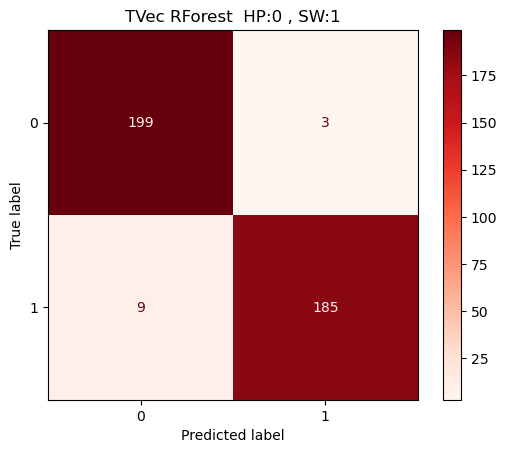

In [27]:
# make predictions and plot to a confusion matrix
preds = gs_tvec_rf.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap = 'Reds')
plt.title('TVec RForest  HP:0 , SW:1');

In [22]:
# view for mismatches, Help from Katie
mismatched_indices = (preds != y_test)
mismatched_texts = X_test[mismatched_indices]

for i, text in enumerate(mismatched_texts):
    predicted_label = preds[mismatched_indices][i]
    true_label = y_test.values[mismatched_indices][i]
    print(f"Predicted: {predicted_label} - Actual: {true_label}\n{text}\n")

Predicted: 0 - Actual: 1
Grogu's direct connection to Snoke. On the nose or I'm overthinking here? - 

Predicted: 1 - Actual: 0
Your favorite weird theories - I've just read a comment about the theory that Filch is Poltergeist like Peeves and represent the order to Peeves' utter chaos. 

It's genuinely one of my favourite weird and definitely not true theories, so I want to ask you all; what's your favourite weird theory that has been created by this fandom? The sort of thing Luna Lovegood and her dad would believe in.

Predicted: 1 - Actual: 0
If Diary Riddle had succeeded in coming back, would there have been two Voldemorts? - We know the original Voldy is hiding in a forest somewhere, barely alive but still alive. So if the horcrux from the diary managed to come alive, what would’ve happened to the original Tom Riddle? Would they merge together? Or will there be two Voldemorts walking around? If that’s the case then can the other horcruxs also just come alive on their own? How do yo

### Conclusion

> This model to my surprise missed a lot of predictions especially for Star Wars. Some of the mismatched errors have words in the most common vectorized words like 'grogu' 'ahsoka'. 
So in conclusion from my models, Tvec with Log regression worked the best.